In [6]:
import numpy as np

import matplotlib.pyplot as plt

from back_euler import BackEuler
from rk4 import Rk4Integrator
from euler_forward import EulerForward

#from utils.figure_generation import generate_figure

In [71]:
t_start = 0
t_end = 100
dt = 0.1

M = 1
r = 6
#v = 0.345
# Solution for  stable orbit
v = np.sqrt(M / r) - 0.0001 * M / r

# Make orbit unstable, with precesion
#v = np.sqrt(M / r) + 0.0001


initial_conditions = np.array([
    r,          # r
    0.0,            # r dot
    0.0,            # phi
    v / r       # phi dot
])

rk4_integrator = Rk4Integrator(initial_conditions, dt, t_end, t_start, M)
euler_integrator = BackEuler(initial_conditions, dt, t_end, t_start, M)
euler_forward_integrator = EulerForward(initial_conditions, dt, t_end, t_start, M)

rk4_integrator.run_simulation()
euler_integrator.run_simulation()
euler_forward_integrator.run_simulation()

# rk4_r_array = rk4_integrator.obs[:,0]
# rk4_r_dot_array = rk4_integrator.obs[:,1]
# rk4_phi_array = rk4_integrator.obs[:,2]
# rk4_phi_dot_array = rk4_integrator.obs[:,3]

# euler_r_array = euler_integrator.obs[:,0]
# euler_r_dot_array = euler_integrator.obs[:,1]
# euler_phi_array = euler_integrator.obs[:,2]
# euler_phi_dot_array = euler_integrator.obs[:,3]

# euler_f_r_array = euler_forward_integrator.obs[:,0]
# euler_f_r_dot_array = euler_forward_integrator.obs[:,1]
# euler_f_phi_array = euler_forward_integrator.obs[:,2]
# euler_f_phi_dot_array = euler_forward_integrator.obs[:,3]

t_array = np.append(rk4_integrator.t_array, t_end)

rk4_x_array = rk4_integrator[:,0] * np.cos(rk4_integrator[:,2])
rk4_y_array = rk4_integrator[:,0] * np.sin(rk4_integrator[:,2])

euler_x_array = euler_integrator[:,0] * np.cos( euler_integrator[:,2])
euler_y_array = euler_integrator[:,0] * np.sin(euler_integrator[:,2])

euler_f_x_array = euler_forward_integrator[:,0] * np.cos(euler_forward_integrator[:,2])
euler_f_y_array = euler_forward_integrator[:,0] * np.sin(euler_forward_integrator[:,2])


In [72]:
eul_f_energy = euler_forward_integrator.get_system_energy()
eul_b_energy = euler_integrator.get_system_energy()
rk4_energy = rk4_integrator.get_system_energy()

[]

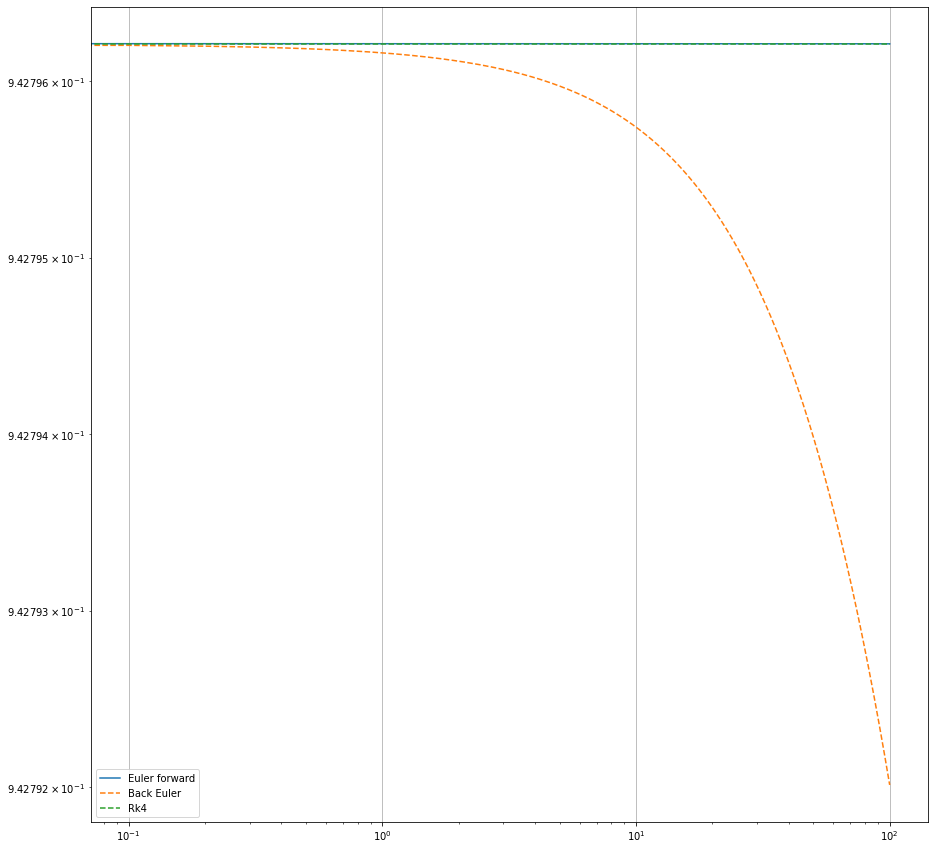

In [75]:
# Plot the path
fig, ax = plt.subplots(1,1, figsize=(15,15))

#plt.plot(t_array, r_array)
#ax.plot(euler_f_x_array, euler_f_y_array, "-", label="Euler forward")
#ax.plot(euler_x_array, euler_y_array, "--", label="Back Euler")
#ax.plot(rk4_x_array, rk4_y_array, "--", label="Rk4")

ax.loglog(t_array, eul_f_energy, "-", label="Euler forward")
ax.loglog(t_array, eul_b_energy, "--", label="Back Euler")
ax.loglog(t_array, rk4_energy, "--", label="Rk4")

ax.legend()
ax.grid()

plt.plot()

No handles with labels found to put in legend.


[]

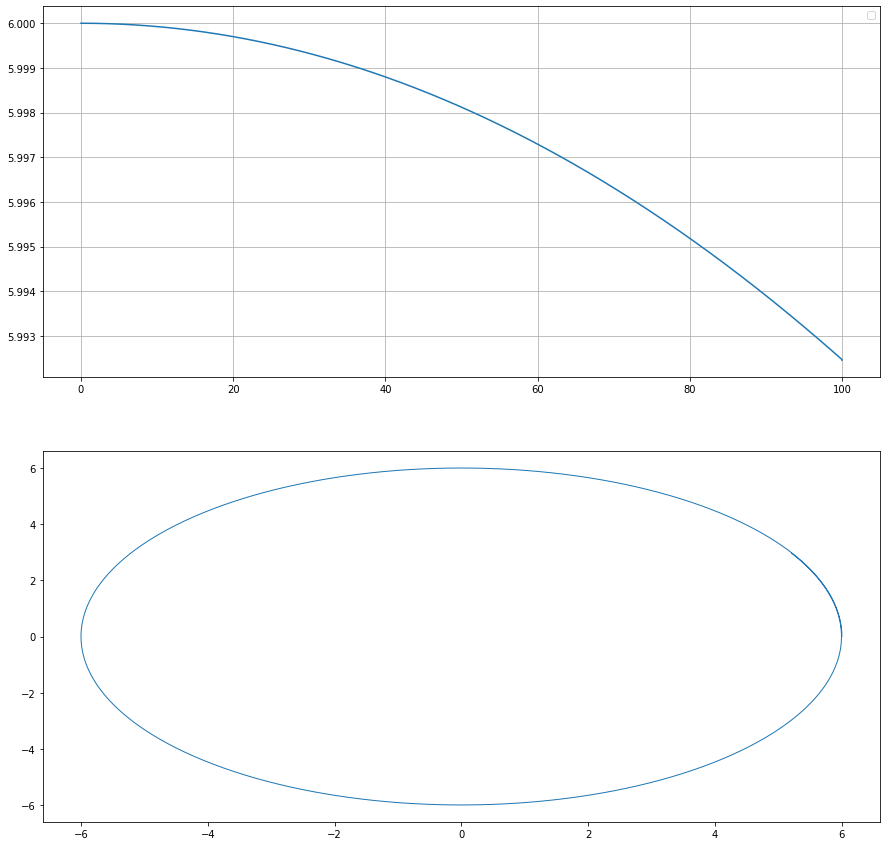

In [74]:
fig, axs = plt.subplots(2,1, figsize=(15,15))

axs[0].plot(t_array, euler_f_r_array)

axs[1].plot(euler_f_x_array, euler_f_y_array, "-", label="Euler forward", linewidth=1)
#ax.plot(euler_x_array, euler_y_array, "--", label="Back Euler")
#ax.plot(rk4_x_array, rk4_y_array, "--", label="Rk4")

axs[0].legend()
axs[0].grid()

# ax.set_xlim((-10.01, -9.99))
# ax.set_ylim((-0.01, 0.01))

plt.plot()

In [41]:
np.mean(euler_f_r_array - r)

0.0